In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.action_chains import ActionChains
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import os

# Replace 'path/to/your/webdriver' with the path to the WebDriver you're using (e.g., chromedriver)


DRIVER_BIN = "/chromedriver"
options = webdriver.ChromeOptions()
service = Service()
target_folder = os.path.join(os.getcwd(), "downloads")
options.add_experimental_option(
    "prefs",
    {
        "download.default_directory": target_folder,
        "download.prompt_for_download": False,
        "download.directory_upgrade": True,
        "safebrowsing.enabled": True,
    },
)
options.add_argument("--headless")
driver = webdriver.Chrome(service=service,options=options)


In [24]:

# Go to the PowerSchool login page
driver.get('https://thsdc2023.calicotab.com/thsdc2023/tab/team/')
# Wait for the page to load completely
time.sleep(5)

h6_elements = driver.find_elements(By.CSS_SELECTOR, 'div.popover-header.d-flex h6.flex-grow-1')

span_content = driver.find_elements(By.CSS_SELECTOR, 'div.popover-body div.list-group-item span')

In [25]:
element_list = [element.get_attribute('innerHTML') for element in h6_elements]
teammate_list = [element.get_attribute('innerHTML') for element in span_content if not element.get_attribute('innerHTML').startswith("Total")]

In [73]:
school_history = dict()
teams = dict()


In [74]:
def remove_prefix(str, prefix):
    return str.lstrip(prefix)

In [107]:
cur = ""
idx=0
for txt in element_list:
    
    if(txt.startswith("Won") or txt.startswith("Lost")):
        name = remove_prefix(txt, "Won against ")
        name = remove_prefix(name, "Lost against ")
    else:
        name=txt
    teams[name] = teammate_list[idx]
    idx+=1
    if not txt.startswith("Won") and not txt.startswith("Lost"):
        cur = txt
        school_history[cur] = []
    else:
        school_history[cur].append(txt)

        

KeyError: ''

In [77]:
print(school_history)

{'Shrewsbury International School 1': ['Won against Patumwan Demonstration School 4', 'Won against Anglo Singapore International School 5', 'Won against International Community School 1', 'Won against Anglo Singapore International School 3', 'Won against Anglo Singapore International School 2'], 'Ruamrudee International School 1': ['Won against Patumwan Demonstration School 5', 'Won against Shrewsbury International School 3', 'Won against The Newton Sixth Form School 1', 'Lost to Anglo Singapore International School 2', 'Won against International Community School 1'], 'Anglo Singapore International School 2': ['Won against Anglo Singapore International School 6', 'Won against Panyarat Hight School 1', 'Won against Anglo Singapore International School 1', 'Won against Ruamrudee International School 1', 'Lost to Shrewsbury International School 1'], 'Anglo Singapore International School 3': ['Won against Anglo Singapore International School 4', 'Won against TriamUdom Suksa 3', 'Won agains

In [78]:
for i in teams:
    print(i,teams[i])

Shrewsbury International School 1 Poomkarn Taedullayasatit, Torfun Chittmittrapap, Jirasita Tohtubtiang
Patumwan Demonstration School 4 Pannawich Kongwuttipanya, Audjagorn Hualcharoenthon, Pannathorn Setarath
Anglo Singapore International School 5 Naruedee Teplertboon, Chiraphat Vattanorom, Paphitchada Chaosuan
International Community School 1 Wen Tian Jing Jason, Peeranat Sugsavanvit, Rasita Vajapattana
Anglo Singapore International School 3 Jintaporn Seemunta, Xiuci Yang, Zike Huang
Anglo Singapore International School 2 Teerasan Rattanasampan, JunHao Cai, Jedidiah Neo
Ruamrudee International School 1 Jirat Chiaranaipanich, Nabhat Thurakitseree, Phantarach Natnithikarat
Patumwan Demonstration School 5 Shinnisha Chulapongwanich, Sirisaran Direkwatana, Hargun Champi
Shrewsbury International School 3 Prim Chantaraprapab (Prim), Minna Chiraphadhanakul (Lily), Passa-on Jesdpiyawong (Poomai)
The Newton Sixth Form School 1 Thadparich Sakulsaksri, Koramist Samorapoom, Kittikhom Kriamorn
Angl

In [79]:
driver.quit()


In [181]:
# start with school_history which has list of teams and matchups
# teammate_list = list of teammates
from elopy import *

r = Implementation()

In [182]:
for name,ppl in teams.items():
    r.addPlayer(name,10000)

In [183]:
r.getRatingList()

[('Shrewsbury International School 1', 10000),
 ('Patumwan Demonstration School 4', 10000),
 ('Anglo Singapore International School 5', 10000),
 ('International Community School 1', 10000),
 ('Anglo Singapore International School 3', 10000),
 ('Anglo Singapore International School 2', 10000),
 ('Ruamrudee International School 1', 10000),
 ('Patumwan Demonstration School 5', 10000),
 ('Shrewsbury International School 3', 10000),
 ('The Newton Sixth Form School 1', 10000),
 ('Anglo Singapore International School 6', 10000),
 ('Panyarat Hight School 1', 10000),
 ('Anglo Singapore International School 1', 10000),
 ('Anglo Singapore International School 4', 10000),
 ('TriamUdom Suksa 3', 10000),
 ('TriamUdom Suksa 1', 10000),
 ('Shrewsbury International School 2', 10000),
 ('International School of Bangkok 1', 10000),
 ('Patumwan Demonstration School 3', 10000),
 ('TriamUdom Suksa 2', 10000),
 ('International Community School 2', 10000),
 ('Anglo Singapore International School 7', 10000),
 

round 1 done
[('Shrewsbury International School 1', 10714.384247748381), ('Patumwan Demonstration School 4', 9285.615752251619), ('Anglo Singapore International School 5', 10714.384247748381), ('International Community School 1', 10714.384247748381), ('Anglo Singapore International School 3', 10714.384247748381), ('Anglo Singapore International School 2', 10714.384247748381), ('Ruamrudee International School 1', 10714.384247748381), ('Patumwan Demonstration School 5', 9285.615752251619), ('Shrewsbury International School 3', 10714.384247748381), ('The Newton Sixth Form School 1', 10714.384247748381), ('Anglo Singapore International School 6', 9285.615752251619), ('Panyarat Hight School 1', 10714.384247748381), ('Anglo Singapore International School 1', 10714.384247748381), ('Anglo Singapore International School 4', 9285.615752251619), ('TriamUdom Suksa 3', 10714.384247748381), ('TriamUdom Suksa 1', 10714.384247748381), ('Shrewsbury International School 2', 9285.615752251619), ('Interna

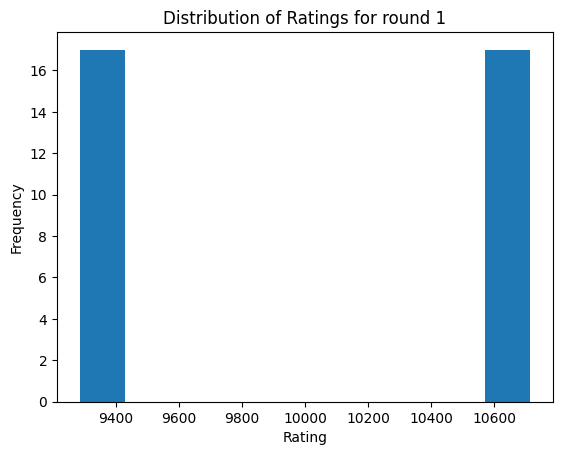

round 2 done
[('Shrewsbury International School 1', 11428.768495496763), ('Patumwan Demonstration School 4', 8571.231504503237), ('Anglo Singapore International School 5', 10000.0), ('International Community School 1', 11428.768495496763), ('Anglo Singapore International School 3', 11428.768495496763), ('Anglo Singapore International School 2', 11428.768495496763), ('Ruamrudee International School 1', 11428.768495496763), ('Patumwan Demonstration School 5', 8571.231504503237), ('Shrewsbury International School 3', 10000.0), ('The Newton Sixth Form School 1', 11428.768495496763), ('Anglo Singapore International School 6', 8571.231504503237), ('Panyarat Hight School 1', 10000.0), ('Anglo Singapore International School 1', 11428.768495496763), ('Anglo Singapore International School 4', 10000.0), ('TriamUdom Suksa 3', 10000.0), ('TriamUdom Suksa 1', 11428.768495496763), ('Shrewsbury International School 2', 10000.0), ('International School of Bangkok 1', 10713.620854157873), ('Patumwan Dem

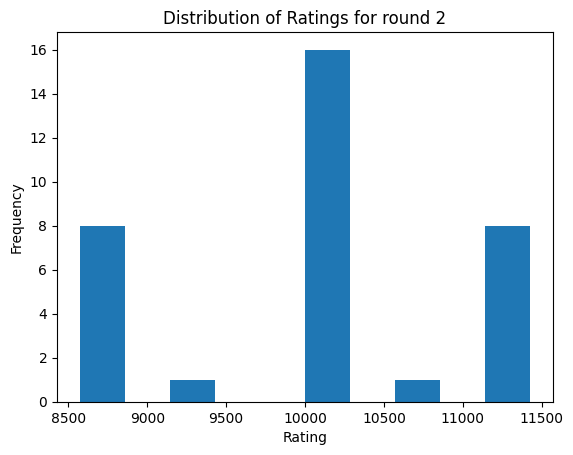

round 3 done
[('Shrewsbury International School 1', 12143.152743245144), ('Patumwan Demonstration School 4', 9285.615752251619), ('Anglo Singapore International School 5', 9285.615752251619), ('International Community School 1', 10714.384247748381), ('Anglo Singapore International School 3', 12143.152743245144), ('Anglo Singapore International School 2', 12143.152743245144), ('Ruamrudee International School 1', 12143.152743245144), ('Patumwan Demonstration School 5', 7856.847256754855), ('Shrewsbury International School 3', 10714.384247748381), ('The Newton Sixth Form School 1', 10714.384247748381), ('Anglo Singapore International School 6', 9285.615752251619), ('Panyarat Hight School 1', 10714.384247748381), ('Anglo Singapore International School 1', 10714.384247748381), ('Anglo Singapore International School 4', 9285.615752251619), ('TriamUdom Suksa 3', 9285.615752251619), ('TriamUdom Suksa 1', 10714.384247748381), ('Shrewsbury International School 2', 10714.384247748381), ('Internat

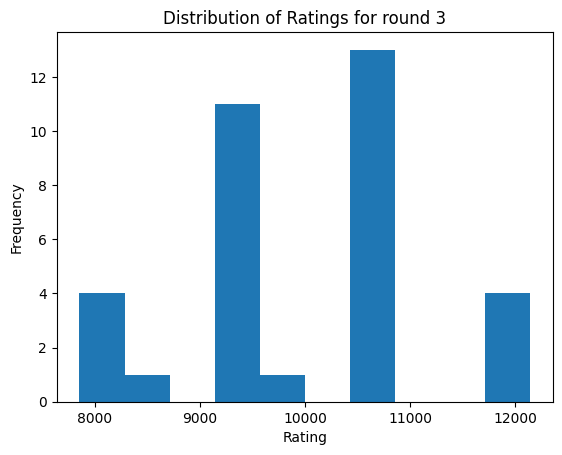

round 4 done
[('Shrewsbury International School 1', 12857.536990993525), ('Patumwan Demonstration School 4', 8571.615752251619), ('Anglo Singapore International School 5', 9999.615752251619), ('International Community School 1', 11428.768495496763), ('Anglo Singapore International School 3', 11428.768495496763), ('Anglo Singapore International School 2', 12857.536990993525), ('Ruamrudee International School 1', 11428.768495496763), ('Patumwan Demonstration School 5', 7142.847256754855), ('Shrewsbury International School 3', 9952.73626770648), ('The Newton Sixth Form School 1', 10000.0), ('Anglo Singapore International School 6', 9999.615752251619), ('Panyarat Hight School 1', 10000.0), ('Anglo Singapore International School 1', 10000.0), ('Anglo Singapore International School 4', 9235.762469682328), ('TriamUdom Suksa 3', 9331.473997080453), ('TriamUdom Suksa 1', 11428.768495496763), ('Shrewsbury International School 2', 11428.768495496763), ('International School of Bangkok 1', 11387.2

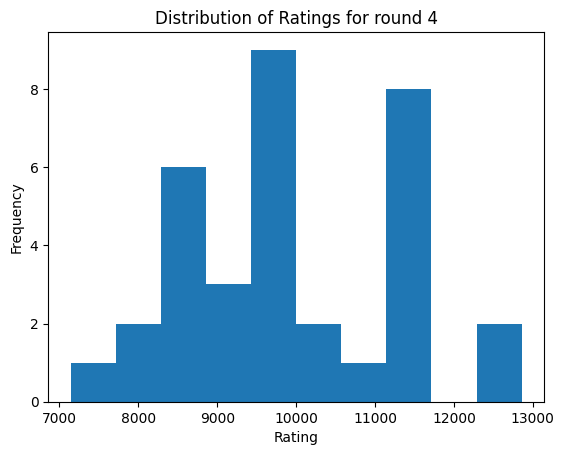

round 5 done
[('Shrewsbury International School 1', 13571.921238741907), ('Patumwan Demonstration School 4', 7856.036452626882), ('Anglo Singapore International School 5', 9304.404970140304), ('International Community School 1', 10714.384247748381), ('Anglo Singapore International School 3', 12143.152743245144), ('Anglo Singapore International School 2', 12143.152743245144), ('Ruamrudee International School 1', 12143.152743245144), ('Patumwan Demonstration School 5', 7142.847256754855), ('Shrewsbury International School 3', 9334.382043673879), ('The Newton Sixth Form School 1', 10618.3542240326), ('Anglo Singapore International School 6', 9286.018503538156), ('Panyarat Hight School 1', 10878.884117953705), ('Anglo Singapore International School 1', 10051.078127022005), ('Anglo Singapore International School 4', 9266.30959715061), ('TriamUdom Suksa 3', 9280.39587005845), ('TriamUdom Suksa 1', 10629.59853303405), ('Shrewsbury International School 2', 10714.384247748381), ('International 

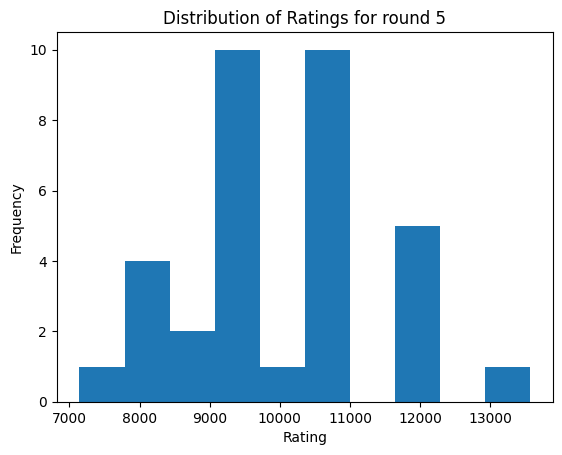

In [184]:
import matplotlib.pyplot as plt

for name,matches in school_history.items():
    rounds = len(matches)
    break
for i in range(rounds):
    try:
        for name,matches in school_history.items():
            opp = matches[i]
            opp = remove_prefix(opp, "Won against ")
            opp = remove_prefix(opp, "Lost against ")
            if matches[i].startswith("Won"):
                r.recordMatch(name,opp,winner=name)
            else:
                r.recordMatch(name,opp,winner=opp)
    except:
        pass
    print(f"round {i+1} done")
    print(r.getRatingList())

    ratings = r.getRatingList()
    rating_values = [rating[1] for rating in ratings]

    plt.hist(rating_values, bins=10)
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.title('Distribution of Ratings for round ' + str(i+1))
    plt.show()
        

In [185]:
rank_list = sorted(r.getRatingList(), key=lambda x: x[1], reverse=True)
for rank in rank_list:
    print(rank[0], rank[1])


Shrewsbury International School 1 13571.921238741907
International School of Bangkok 1 12186.38668306624
Anglo Singapore International School 3 12143.152743245144
Anglo Singapore International School 2 12143.152743245144
Ruamrudee International School 1 12143.152743245144
TriamUdom Suksa 2 12117.941660592971
Panyarat Hight School 1 10878.884117953705
Patumwan Demonstration School 3 10763.763148143915
International Community School 1 10714.384247748381
Shrewsbury International School 2 10714.384247748381
Swing Team 10714.384247748381
King Mongkut's Institute of Technology Ladkrabang International Demonstration School 3 10713.597248713462
Patumwan Demonstration School 2 10713.597248713462
International Community School 2 10704.192809505703
TriamUdom Suksa 1 10629.59853303405
The Newton Sixth Form School 1 10618.3542240326
Anglo Singapore International School 1 10051.078127022005
Shrewsbury International School 3 9334.382043673879
Anglo Singapore International School 5 9304.404970140304
K